In [71]:
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
#IMPLEMENTED FUNCTIONS
from functions import make_matrix, get_tol_matrix, iteration, dis_algo, print_matrix, get_happiness, get_agents, get_r, save_data, run, get_r_average_sample_circle, sample_circles, get_r_circle, color_map

In [2]:
def average(lista):
    return sum(lista)/len(lista)

Define system conditions

In [3]:
N       = 50 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.5 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.1 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.9 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [4]:
output = run(N=N, density=density, f1=f1, measure_r_values=True, measure_happiness=True)

<IPython.core.display.Javascript object>


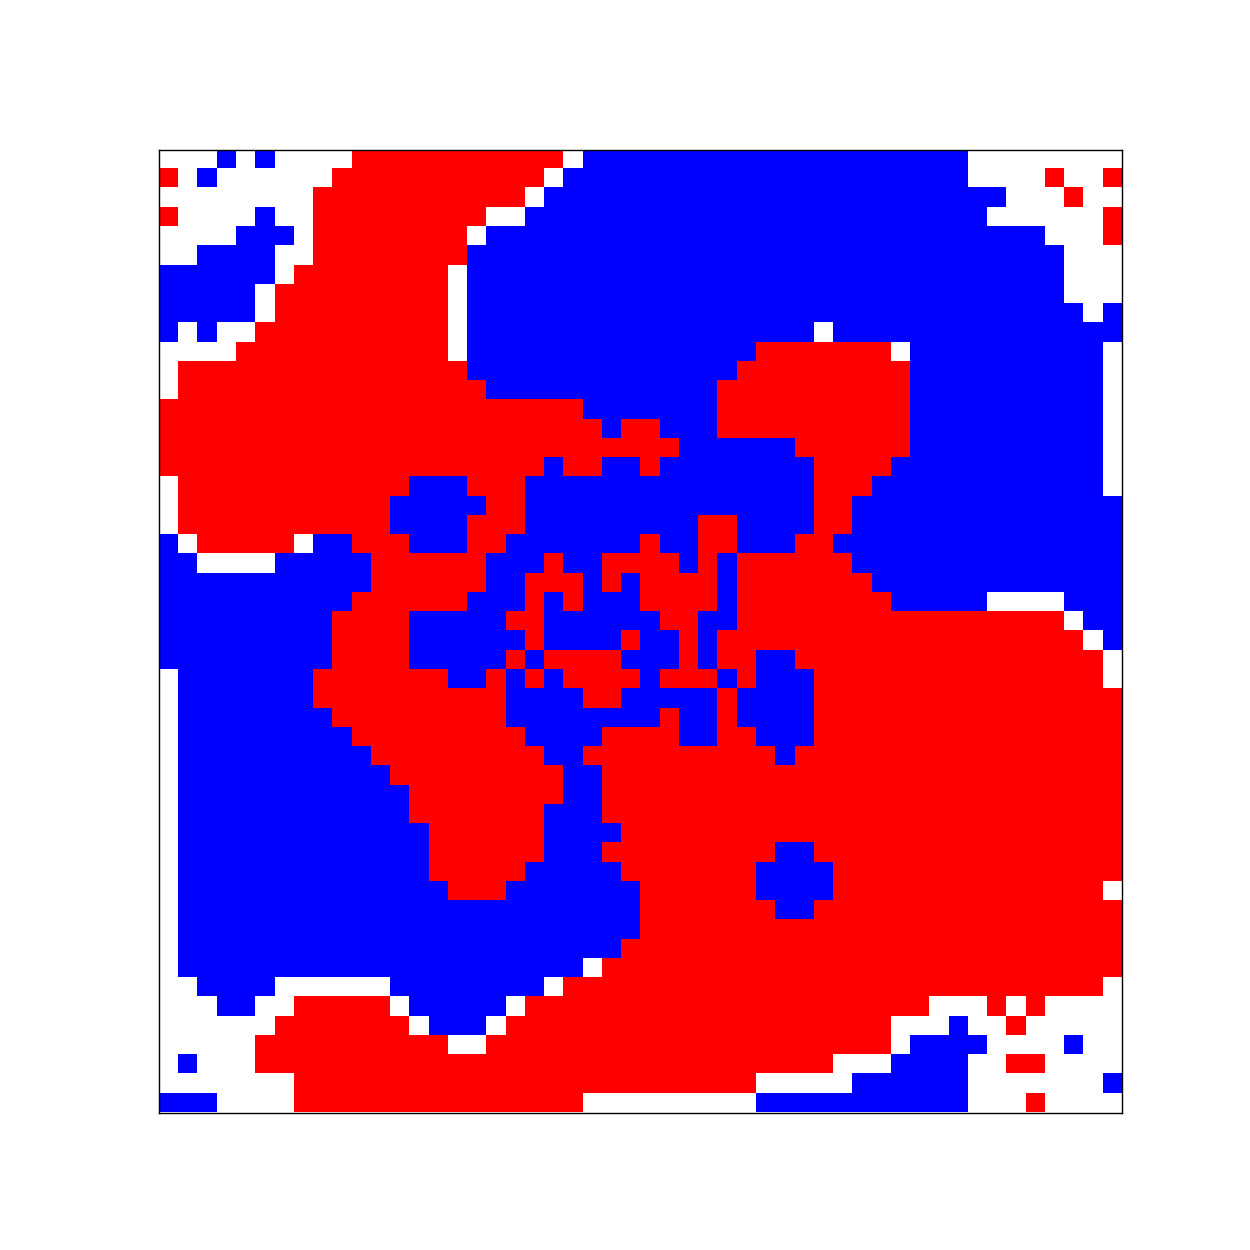

In [19]:
print_matrix(output['matrix'])

# QUANDO NÃO HÁ MINORIA

Skip this

In [7]:
def gauss(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [8]:
#(mu_r, sigma_r) = norm.fit(avg_r_red)
#(mu_b, sigma_b) = norm.fit(avg_r_blu)

In [9]:
#n_r, bins, patch = plt.hist(avg_r_red, 40, color='red' , density=True, alpha=0.4)
#n_b, bins, patch = plt.hist(avg_r_blu, 40, color='blue', density=True, alpha=0.4)

#plt.plot(x, max(n_r)*gauss(x, mu_r, sigma_r), '--', color='red')
#plt.plot(x, max(n_b)*gauss(x, mu_b, sigma_b), '--', color='blue')

In [9]:
#data      = [avg_r_red, avg_r_blu]
#save_data(data, 'TLC_50_50.txt')

# FAZENDO VARIAR O VALOR DE f1 POR ITERAÇÃO

In [55]:
tmax = 0.9
tmin = 0.1

f1s = np.linspace(0.01, 0.99, 99)

In [11]:
avg_r_blu_ = list()
avg_r_red_ = list()

for f1 in f1s:
    print('\n' + str(round(f1, 2)) + '/' + '0.99')
    output = run(N=N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_.append(average(output['red_rs'][-1]))
    avg_r_blu_.append(average(output['blu_rs'][-1]))


0.01/0.99
Finished!
0.02/0.99
Finished!
0.03/0.99
Finished!
0.04/0.99
Finished!
0.05/0.99
Finished!
0.06/0.99
Finished!
0.07/0.99
Finished!
0.08/0.99
Finished!
0.09/0.99
Finished!
0.1/0.99
Finished!
0.11/0.99
Finished!
0.12/0.99
Finished!
0.13/0.99
Finished!
0.14/0.99
Finished!
0.15/0.99
Finished!
0.16/0.99
Finished!
0.17/0.99
Finished!
0.18/0.99
Finished!
0.19/0.99
Finished!
0.2/0.99
Finished!
0.21/0.99
Finished!
0.22/0.99
Finished!
0.23/0.99
Finished!
0.24/0.99
Finished!
0.25/0.99
Finished!
0.26/0.99
Finished!
0.27/0.99
Finished!
0.28/0.99
Finished!
0.29/0.99
Finished!
0.3/0.99
Finished!
0.31/0.99
Finished!
0.32/0.99
Finished!
0.33/0.99
Finished!
0.34/0.99
Finished!
0.35/0.99
Finished!
0.36/0.99
Finished!
0.37/0.99
Finished!
0.38/0.99
Finished!
0.39/0.99
Finished!
0.4/0.99
Finished!
0.41/0.99
Finished!
0.42/0.99
Finished!
0.43/0.99
Finished!
0.44/0.99
Finished!
0.45/0.99
Finished!
0.46/0.99
Finished!
0.47/0.99
Finished!
0.48/0.99
Finished!
0.49/0.99
Finished!
0.5/0.99
Finished!
0.51

(0.4, 1.0)

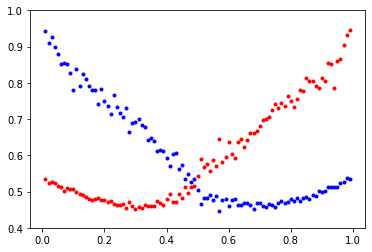

In [12]:
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_red_], '.', color='red')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_blu_], '.', color='blue')

plt.ylim(0.4, 1)

In [56]:
avg_sampled_small = sample_circles(N,f1s,density)

In [14]:
r_circle = [get_r_circle(N, density, f1_) for f1_ in f1s]

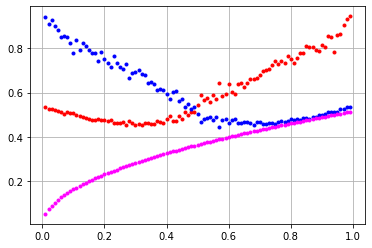

In [66]:
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_red_], '.', color='red')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_blu_], '.', color='blue')
#plt.plot(f1s, [2*r/N for r in r_circle], color='green')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_sampled_small], '.', color='magenta')

#plt.xlim(0.5, 1)
#plt.ylim(0.3, 0.8)
plt.grid()

In [21]:
ratio_sampled = list()
ratio_th = list()

for i in range(len(f1s)):
    ratio_sampled.append(avg_r_blu_[i]/avg_sampled[i])
    ratio_th.append(avg_r_blu_[i]/r_circle[i])

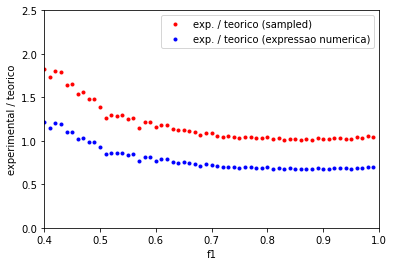

In [30]:
plt.plot(f1s, ratio_sampled, '.', color='red',label="exp. / teorico (sampled)")
plt.plot(f1s, ratio_th, '.', color='blue',label="exp. / teorico (expressao numerica)")

plt.xlim(0.4, 1)
plt.ylim(0, 2.5)

plt.xlabel("f1")
plt.ylabel("experimental / teorico")

plt.legend()

VARIAMOS O INTERVALO DOS VALORES DE T E VEMOS O QUE ACONTECE

In [ ]:
tmax = 0.9
tmin = 0.1

f1s_large = np.linspace(0.01, 0.99, 200)

In [ ]:
avg_r_blu_2 = list()
avg_r_red_2 = list()

for f1 in f1s_large:
    print(str(round(f1, 2)) + '/' + '0.99')
    output = run(N=2*N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_2.append(average(output['red_rs'][-1]))
    avg_r_blu_2.append(average(output['blu_rs'][-1]))

In [ ]:
plt.plot(f1s_large, avg_r_red_2, '.', color='red')
plt.plot(f1s_large, avg_r_blu_2, '.', color='blue')

In [ ]:
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_red_2], '.', color='red')
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_blu_2], '.', color='blue')

In [ ]:
avg_sampled = sample_circles(2*N,f1s_large,density)

In [ ]:
r_circle = [get_r_circle(2*N, density, f1_) for f1_ in f1s_large]

In [ ]:
plt.plot(f1s_large, avg_r_red_2, '.', color='red')
plt.plot(f1s_large, avg_r_blu_2, '.', color='blue')
#plt.plot(f1s_large, [get_r_circle(2*N, density, f1_) for f1_ in f1s_large], color='green')
plt.plot(f1s_large, avg_sampled, '.', color='magenta')

#plt.xlim(0.4, 1)
#plt.ylim(10, 60)

In [ ]:
ratio_sampled = list()
ratio_th = list()

for i in range(len(f1s_large)):
    ratio_sampled.append(avg_r_blu_2[i]/avg_sampled[i])
    ratio_th.append(avg_r_blu_2[i]/r_circle[i])

In [ ]:
plt.plot(f1s_large, ratio_sampled, '.', color='red',label="exp. / teorico (sampled)")
plt.plot(f1s_large, ratio_th, '.', color='blue',label="exp. / teorico (expressao numerica)")

plt.xlim(0.5, 1)
plt.ylim(0.2, 1.7)

plt.xlabel("f1")
plt.ylabel("experimental / teorico")

plt.legend()
plt.grid()

In [ ]:
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_red_2], '.', color='red')
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_blu_2], '.', color='blue')
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_sampled], '.', color='magenta')

#plt.xlim(0, 1)
#plt.ylim(0, 3)
plt.grid()

**DIFERENTES DENSIDADES**

In [8]:
tmax = 0.9
tmin = 0.1

f1s_ = np.linspace(0.01, 0.99, 100)
ds_ = np.linspace(0.3, 0.98, 100)

d_reds = list()
d_blues = list()

for d in ds_:
    print("d: " + str(round(d, 2)) + '/' + '0.98')
    avg_r_blu_d = list()
    avg_r_red_d = list()
    
    for f1 in f1s_:
        #print("> f1) " + str(round(f1, 2)) + '/' + '0.99',end='\r')
        output = run(N=N, density=d, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
        avg_r_red_d.append(average(output['red_rs'][-1]))
        avg_r_blu_d.append(average(output['blu_rs'][-1]))
    
    d_reds.append(avg_r_red_d)
    d_blues.append(avg_r_blu_d)

d: 0.3/0.98
d: 0.31/0.98
d: 0.31/0.98
d: 0.32/0.98
d: 0.33/0.98
d: 0.33/0.98
d: 0.34/0.98
d: 0.35/0.98
d: 0.35/0.98
d: 0.36/0.98
d: 0.37/0.98
d: 0.38/0.98
d: 0.38/0.98
d: 0.39/0.98
d: 0.4/0.98
d: 0.4/0.98
d: 0.41/0.98
d: 0.42/0.98
d: 0.42/0.98
d: 0.43/0.98
d: 0.44/0.98
d: 0.44/0.98
d: 0.45/0.98
d: 0.46/0.98
d: 0.46/0.9800
d: 0.47/0.98
d: 0.48/0.98
d: 0.49/0.98
d: 0.49/0.98
d: 0.5/0.98
d: 0.51/0.98
d: 0.51/0.98
d: 0.52/0.98
d: 0.53/0.9800
d: 0.53/0.98
d: 0.54/0.98
d: 0.55/0.98
d: 0.55/0.98
d: 0.56/0.98
d: 0.57/0.9800
d: 0.57/0.98
d: 0.58/0.98
d: 0.59/0.98
d: 0.6/0.98
d: 0.6/0.98
d: 0.61/0.98
d: 0.62/0.98
d: 0.62/0.98
d: 0.63/0.98
d: 0.64/0.98
d: 0.64/0.98
d: 0.65/0.98
d: 0.66/0.98
d: 0.66/0.98
d: 0.67/0.98
d: 0.68/0.98
d: 0.68/0.98
d: 0.69/0.98
d: 0.7/0.98
d: 0.71/0.98
d: 0.71/0.98
d: 0.72/0.98
d: 0.73/0.98
d: 0.73/0.98
d: 0.74/0.98
d: 0.75/0.98
d: 0.75/0.9800
d: 0.76/0.98
d: 0.77/0.98
d: 0.77/0.9800
d: 0.78/0.98
d: 0.79/0.98
d: 0.79/0.98
d: 0.8/0.98
d: 0.81/0.98
d: 0.82/0.98
d: 0.82/0.

In [30]:
from matplotlib import animation as ani
%matplotlib notebook

In [68]:
def build_plots(i):
    plt.cla()
    plt.ylabel('average radius')
    plt.xlabel('f1')
    plt.xlim(0,1)
    plt.ylim(0.2,1)
    plt.text(0.45,0.8,"d = " + str(round(ds_[i], 3)))
    plt.plot(f1s_, [r/(get_r(0, 0, N)) for r in d_reds[i]], '.', color='red',scaley=False, scalex=False)
    plt.plot(f1s_, [r/(get_r(0, 0, N)) for r in d_blues[i]], '.', color='blue',scaley=False, scalex=False)

<IPython.core.display.Javascript object>


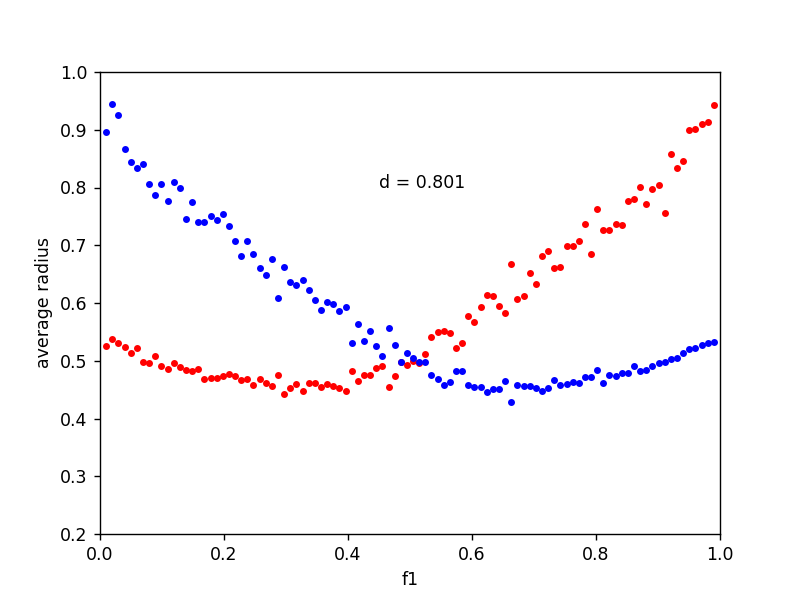

MovieWriter Pillow unavailable; using Pillow instead.


In [72]:
color = ['red', 'blue']
fig = plt.figure()
plt.ylabel('average radius')
plt.xlabel('f1')
plt.xlim(0,1)
plt.ylim(0.2,1)
plt.grid()

animator = ani.FuncAnimation(fig, build_plots, interval = 100, frames=len(d_reds))
plt.show()
animator.save("d.gif", writer="Pillow")

In [169]:
N       = 100 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.4 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.3 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.7 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [170]:
def draw_matrix_animation(frame,*fargs):
    
    matrix_ = fargs[0]
    tol_matrix = fargs[1]
    im = fargs[2]
    
    color_map = {-1: np.array([255, 0, 0]), # red
             0: np.array([255, 255, 255]), # green
             1: np.array([0, 0, 255])} # blue
    
    N_ = len(matrix_)
    
    new_matrix = iteration(matrix_, dis_algo, tol_matrix)
    
    matrix_ = new_matrix.copy()

    if new_matrix == "STOP":
        plt.text(0.5,0.5,"Done!")
             
    data_3d_ = np.ndarray(shape=(N_, N_, 3), dtype=int)
    for i in range(0, N):
        for j in range(0, N):
            data_3d_[i][j] = color_map[new_matrix[i][j]]

    #ax.cla()
    
    im.set_data(data_3d_)
    #frame_text = plt.text(1.15,1.15,"t = " + str(frame))
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.show()

In [171]:
def init_draw_iterations(matrix_,tol_matrix,im):
    #N_ = len(matrix_)
    
    #color_map = {-1: np.array([255, 0, 0]), # red
             #0: np.array([255, 255, 255]), # green
             #1: np.array([0, 0, 255])} # blue
        
    #data_3d = np.ndarray(shape=(N_, N_, 3), dtype=int)
    #for i in range(0, N):
        #for j in range(0, N):
            #data_3d[i][j] = color_map[matrix_[i][j]]

    #im.set_data(data_3d)
    
    print("Initializing...")

<IPython.core.display.Javascript object>


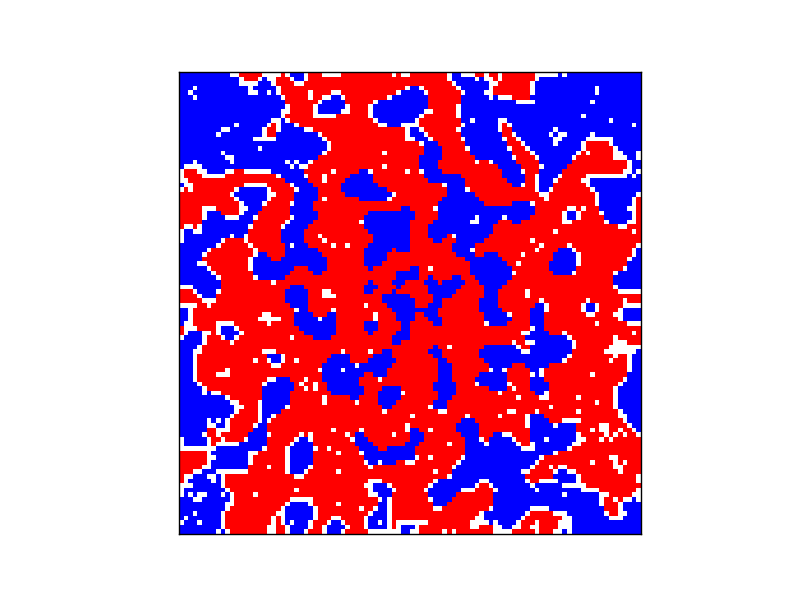

Initializing...


In [173]:
fig_anim = plt.figure()

ax = fig_anim.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

matrix_    = make_matrix(N, density, f1)
tol_matrix = get_tol_matrix(N, tmax=tmax, tmin=tmin)
#print_matrix(matrix_)

N_ = len(matrix_)
data_3d = np.ndarray(shape=(N_, N_, 3), dtype=int)
for i in range(0, N):
        for j in range(0, N):
            data_3d[i][j] = color_map[matrix_[i][j]]
im = ax.imshow(data_3d)
#frame_text = plt.text(1.15,1.15,"t = " + str(0))

animator = ani.FuncAnimation(fig_anim, draw_matrix_animation, init_func = init_draw_iterations(matrix_,tol_matrix,im), fargs = [matrix_,tol_matrix,im], interval = 100, frames=200)
plt.show()
#animator.save("sim.gif", writer="Pillow")